<h2><b>Contours</b></h2><br>

In [1]:
# Import Necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

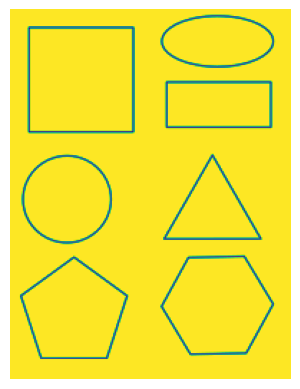

In [7]:
# Read Input image
twod_shapes = cv2.imread("../Images/twod_shapes.png")
gray = cv2.cvtColor(twod_shapes, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis("off")
plt.show()


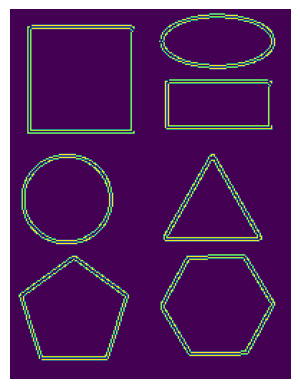

Number of Contours found = 13


In [8]:
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged)
plt.axis("off")
plt.show()

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

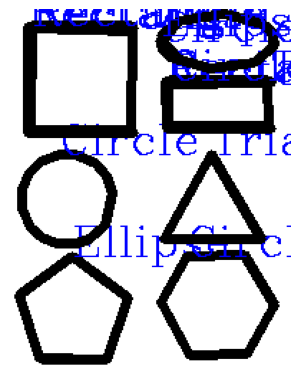

In [12]:
# Set font to FONT_HERSHEY_COMPLEX
font = cv2.FONT_HERSHEY_COMPLEX
# fontScale
fontScale = 1

# Blue color in BGR
color = (0, 0, 255)

# Line thickness of 2 px
thickness = 1
# Loop through the contours and label them
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(twod_shapes, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 3:
        cv2.putText(twod_shapes, "Triangle", (x, y), font,fontScale, color, thickness, 1, (0))
    elif len(approx) == 4:
        cv2.putText(twod_shapes, "Rectangle", (x, y), font,fontScale, color, thickness, 1, (0))
    elif len(approx) == 5:
        cv2.putText(twod_shapes, "Pentagon", (x, y), font,fontScale, color, thickness, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(twod_shapes, "Ellipse", (x, y), font,fontScale, color, thickness, 1, (0))
    else:
        cv2.putText(twod_shapes, "Circle", (x, y), font,fontScale, color, thickness, 1, (0))


# Save Output Image
cv2.imwrite("../Images/DetectedShapes1.jpg", twod_shapes)

plt.imshow(twod_shapes)
plt.axis("off")
plt.show()
